# Część I

### Zadanie 1.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.mosaicplot import mosaic

In [3]:
df = pd.read_csv('ankieta.csv', sep=';')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DZIAL     200 non-null    object
 1   STAZ      200 non-null    int64 
 2   CZY_KIER  200 non-null    object
 3   PYT_1     200 non-null    int64 
 4   PYT_2     200 non-null    int64 
 5   PYT_3     200 non-null    int64 
 6   PLEC      200 non-null    object
 7   WIEK      200 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 12.6+ KB


In [5]:
df['DZIAL'] = df['DZIAL'].astype('category')
print(df['DZIAL'].cat.categories)

Index(['HR', 'IT', 'MK', 'PD'], dtype='object')


In [6]:
df['STAZ'] = df['STAZ'].astype('category')
print(df['STAZ'].cat.categories)

Index([1, 2, 3], dtype='int64')


In [7]:
df['CZY_KIER'] = df['CZY_KIER'].astype('category')
print(df['CZY_KIER'].cat.categories)

Index(['Nie', 'Tak'], dtype='object')


In [8]:
df['PLEC'] = df['PLEC'].astype('category')
print(df['PLEC'].cat.categories)

Index(['K', 'M'], dtype='object')


In [9]:
bins = [0, 35, 45, 55, float('inf')]  
labels = ['<35', '36-45', '46-55', '>55']

df['WIEK_KAT'] = pd.cut(df['WIEK'], bins=bins, labels=labels, right=True)

df['WIEK_KAT'] = df['WIEK_KAT'].astype('category')
print(df['WIEK_KAT'].cat.categories)
df.info()

Index(['<35', '36-45', '46-55', '>55'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   DZIAL     200 non-null    category
 1   STAZ      200 non-null    category
 2   CZY_KIER  200 non-null    category
 3   PYT_1     200 non-null    int64   
 4   PYT_2     200 non-null    int64   
 5   PYT_3     200 non-null    int64   
 6   PLEC      200 non-null    category
 7   WIEK      200 non-null    int64   
 8   WIEK_KAT  200 non-null    category
dtypes: category(5), int64(4)
memory usage: 8.1 KB


In [10]:
df['DZIAL'].value_counts()

DZIAL
PD    98
MK    45
HR    31
IT    26
Name: count, dtype: int64

In [11]:
df['STAZ'].value_counts()

STAZ
2    140
1     41
3     19
Name: count, dtype: int64

In [12]:
df['CZY_KIER'].value_counts()

CZY_KIER
Nie    173
Tak     27
Name: count, dtype: int64

In [13]:
df['PLEC'].value_counts()

PLEC
M    129
K     71
Name: count, dtype: int64

In [14]:
df['WIEK_KAT'].value_counts()

WIEK_KAT
36-45    104
46-55     45
<35       26
>55       25
Name: count, dtype: int64

<AxesSubplot: xlabel='PYT_1'>

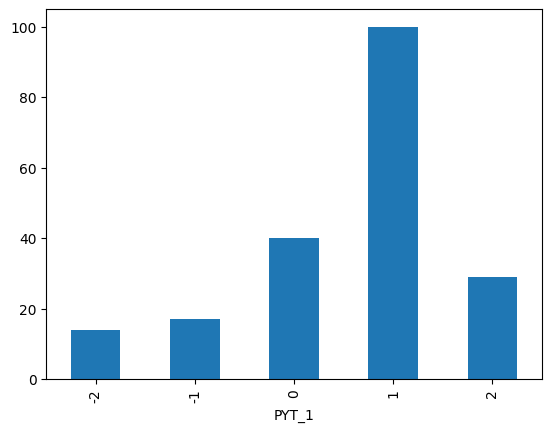

In [15]:
ft = df['PYT_1'].value_counts().sort_index()
ft.plot(kind='bar')

<AxesSubplot: ylabel='count'>

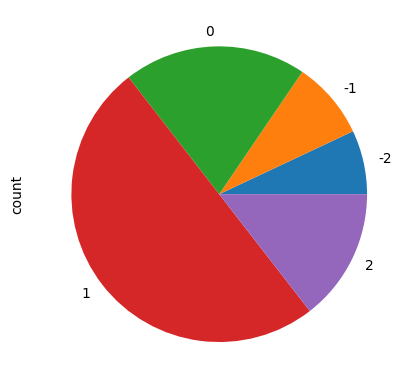

In [16]:
ft.plot(kind='pie')

<AxesSubplot: xlabel='PYT_2'>

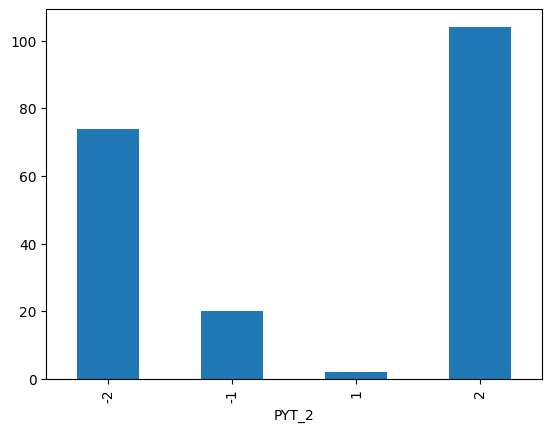

In [17]:
ft = df['PYT_2'].value_counts().sort_index()
ft.plot(kind='bar')

<AxesSubplot: ylabel='count'>

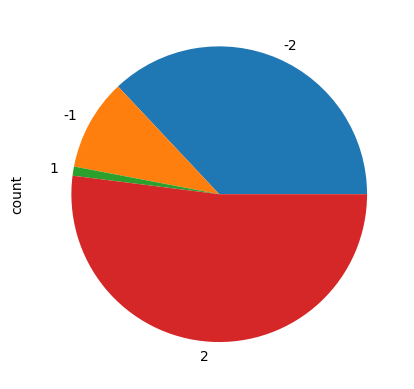

In [18]:
ft.plot(kind='pie')

In [19]:
pd.crosstab(df['PYT_1'], df['DZIAL'])

DZIAL,HR,IT,MK,PD
PYT_1,,,,
-2,2,0,3,9
-1,2,2,3,10
0,5,4,14,17
1,19,15,15,51
2,3,5,10,11


In [20]:
pd.crosstab(df['PYT_1'], df['STAZ'])

STAZ,1,2,3
PYT_1,,,
-2,5,5,4
-1,6,10,1
0,8,26,6
1,19,75,6
2,3,24,2


In [21]:
pd.crosstab(df['PYT_1'], df['CZY_KIER'])

CZY_KIER,Nie,Tak
PYT_1,,
-2,10,4
-1,14,3
0,34,6
1,88,12
2,27,2


In [22]:
pd.crosstab(df['PYT_1'], df['PLEC'])

PLEC,K,M
PYT_1,,
-2,3,11
-1,7,10
0,14,26
1,36,64
2,11,18


In [23]:
pd.crosstab(df['PYT_1'], df['WIEK_KAT'])

WIEK_KAT,<35,36-45,46-55,>55
PYT_1,,,,
-2,1,11,2,0
-1,6,7,1,3
0,3,24,5,8
1,13,50,25,12
2,3,12,12,2


In [24]:
pd.crosstab(df['PYT_2'], df['PYT_3'])

PYT_3,-2,-1,1,2
PYT_2,,,,
-2,49,16,5,4
-1,3,6,10,1
1,0,0,2,0
2,0,8,15,81


In [25]:
labels = ['zdecydowanie się nie zgadzam', 'nie zgadzam się', 'zgadzam się', 'zdecydowanie się zgadzam']  

conditions = [
    (df['PYT_2'] == -2), 
    (df['PYT_2'] == -1),  
    (df['PYT_2'] == 1),   
    (df['PYT_2'] == 2)   
]

df['CZY_ZADOW'] = np.select(conditions, labels, default='Nieokreślone')
df['CZY_ZADOW'] = df['CZY_ZADOW'].astype('category')
print(df['CZY_ZADOW'].cat.categories)
df.info()

Index(['nie zgadzam się', 'zdecydowanie się nie zgadzam',
       'zdecydowanie się zgadzam', 'zgadzam się'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   DZIAL      200 non-null    category
 1   STAZ       200 non-null    category
 2   CZY_KIER   200 non-null    category
 3   PYT_1      200 non-null    int64   
 4   PYT_2      200 non-null    int64   
 5   PYT_3      200 non-null    int64   
 6   PLEC       200 non-null    category
 7   WIEK       200 non-null    int64   
 8   WIEK_KAT   200 non-null    category
 9   CZY_ZADOW  200 non-null    category
dtypes: category(6), int64(4)
memory usage: 8.5 KB


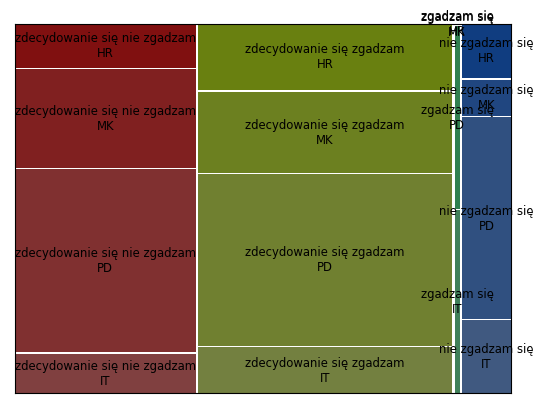

In [26]:
fig = mosaic(df, ['CZY_ZADOW', 'DZIAL'], axes_label=False)[0]
plt.show()

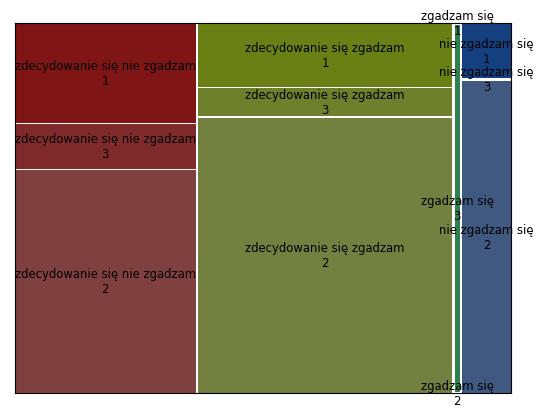

In [27]:
mosaic(df, ['CZY_ZADOW', 'STAZ'], axes_label=False)
plt.show()

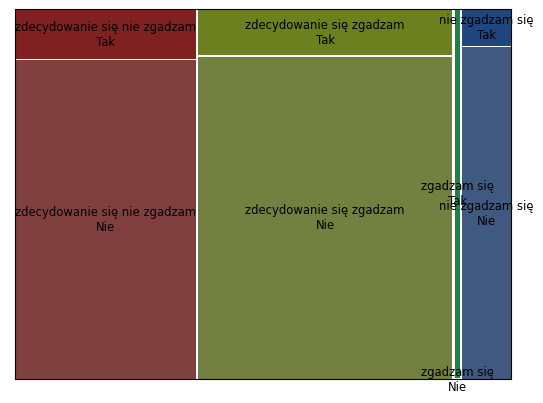

In [28]:
mosaic(df, ['CZY_ZADOW', 'CZY_KIER'], axes_label=False)
plt.show()

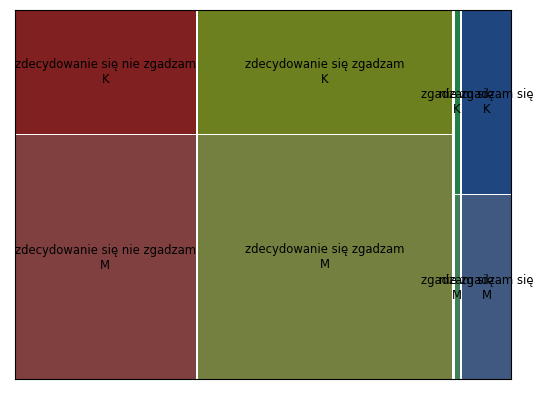

In [29]:
mosaic(df, ['CZY_ZADOW', 'PLEC'], axes_label=False)
plt.show()

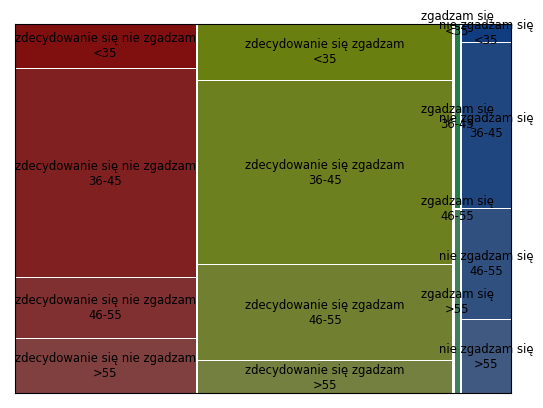

In [30]:
mosaic(df, ['CZY_ZADOW', 'WIEK_KAT'], axes_label=False)
plt.show()

# Część II

### Zadanie 2.

In [36]:
import altair as alt

In [53]:
df1 = df[['PYT_1', 'CZY_KIER']]

labels = {
    -2: "Zdecydowanie się nie zgadzam",
    -1: "Nie zgadzam się",
    0: "Neutralnie",
    1: "Zgadzam się",
    2: "Zdecydowanie się zgadzam"
}
df1['PYT_1_label'] = df1['PYT_1'].map(labels)

# Tworzenie wykresu dla całej grupy
overall_chart = (
    alt.Chart(df1)
    .mark_bar()
    .encode(
        x=alt.X('PYT_1_label:O', title='Ocena', sort=list(labels.values())),
        y=alt.Y('count()', title='Liczba odpowiedzi'),
        tooltip=['count()']
    )
    .properties(title='Rozkład odpowiedzi w całej grupie')
)

# Tworzenie wykresu podzielonego na kierowników i niekierowników
subgroup_chart = (
    alt.Chart(df1)
    .mark_bar()
    .encode(
        x=alt.X('PYT_1_label:O', title='Ocena', sort=list(labels.values())),
        y=alt.Y('count()', title='Liczba odpowiedzi'),
        color='CZY_KIER:N',
        column=alt.Column('CZY_KIER:N', title='Czy kierownik?'),
        tooltip=['count()']
    )
    .properties(title='Rozkład odpowiedzi w podgrupach')
)

# Wyświetlenie wykresów
alt.hconcat(overall_chart, subgroup_chart)

C:\Users\julka\AppData\Local\Temp\ipykernel_3272\2964558530.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['PYT_1_label'] = df1['PYT_1'].map(labels)


alt.HConcatChart(...)

### Zadanie 3.

In [60]:
with_replacement = np.random.choice(df.index, size=int(0.1*len(df)), replace=True)
sample_with_replecement = df.loc[with_replacement]

without_replacement = np.random.choice(df.index, size=int(0.1*len(df)), replace=True)
sample_without_replecement = df.loc[without_replacement]

display('Ze zwracaniem:',sample_with_replecement)
display('Bez zwracania:', sample_without_replecement)

'Ze zwracaniem:'

,DZIAL,STAZ,CZY_KIER,PYT_1,PYT_2,PYT_3,PLEC,WIEK,WIEK_KAT,CZY_ZADOW,CZY_ZADOW_1
115,PD,1,Nie,1,-1,-1,M,37,36-45,nie zgadzam się,zgadzam się
30,PD,1,Nie,1,2,2,M,32,<35,zdecydowanie się zgadzam,zgadzam się
2,IT,2,Nie,1,2,2,M,65,>55,zdecydowanie się zgadzam,zgadzam się
21,IT,3,Nie,1,2,-1,K,64,>55,zdecydowanie się zgadzam,zgadzam się
53,PD,1,Nie,0,-2,-2,M,41,36-45,zdecydowanie się nie zgadzam,Nieokreślone
88,PD,1,Nie,1,2,2,M,55,46-55,zdecydowanie się zgadzam,zgadzam się
76,PD,2,Nie,1,2,1,K,41,36-45,zdecydowanie się zgadzam,zgadzam się
154,MK,2,Nie,2,2,2,M,32,<35,zdecydowanie się zgadzam,zdecydowanie się zgadzam
141,MK,2,Nie,-1,-2,-1,K,30,<35,zdecydowanie się nie zgadzam,nie zgadzam się
88,PD,1,Nie,1,2,2,M,55,46-55,zdecydowanie się zgadzam,zgadzam się


'Bez zwracania:'

,DZIAL,STAZ,CZY_KIER,PYT_1,PYT_2,PYT_3,PLEC,WIEK,WIEK_KAT,CZY_ZADOW,CZY_ZADOW_1
62,PD,2,Nie,2,2,2,M,50,46-55,zdecydowanie się zgadzam,zdecydowanie się zgadzam
95,PD,2,Nie,-2,-2,-1,M,36,36-45,zdecydowanie się nie zgadzam,zdecydowanie się nie zgadzam
155,MK,2,Nie,0,-2,-2,M,37,36-45,zdecydowanie się nie zgadzam,Nieokreślone
160,MK,2,Nie,1,2,2,M,36,36-45,zdecydowanie się zgadzam,zgadzam się
4,IT,3,Tak,1,2,-1,K,65,>55,zdecydowanie się zgadzam,zgadzam się
143,MK,2,Nie,0,-2,-2,K,46,46-55,zdecydowanie się nie zgadzam,Nieokreślone
91,PD,2,Nie,1,2,2,M,45,36-45,zdecydowanie się zgadzam,zgadzam się
61,PD,2,Nie,2,-1,-2,M,50,46-55,nie zgadzam się,zdecydowanie się zgadzam
188,HR,2,Nie,1,2,2,M,49,46-55,zdecydowanie się zgadzam,zgadzam się
54,PD,2,Nie,0,-2,-2,M,41,36-45,zdecydowanie się nie zgadzam,Nieokreślone


### Zadaie 4.

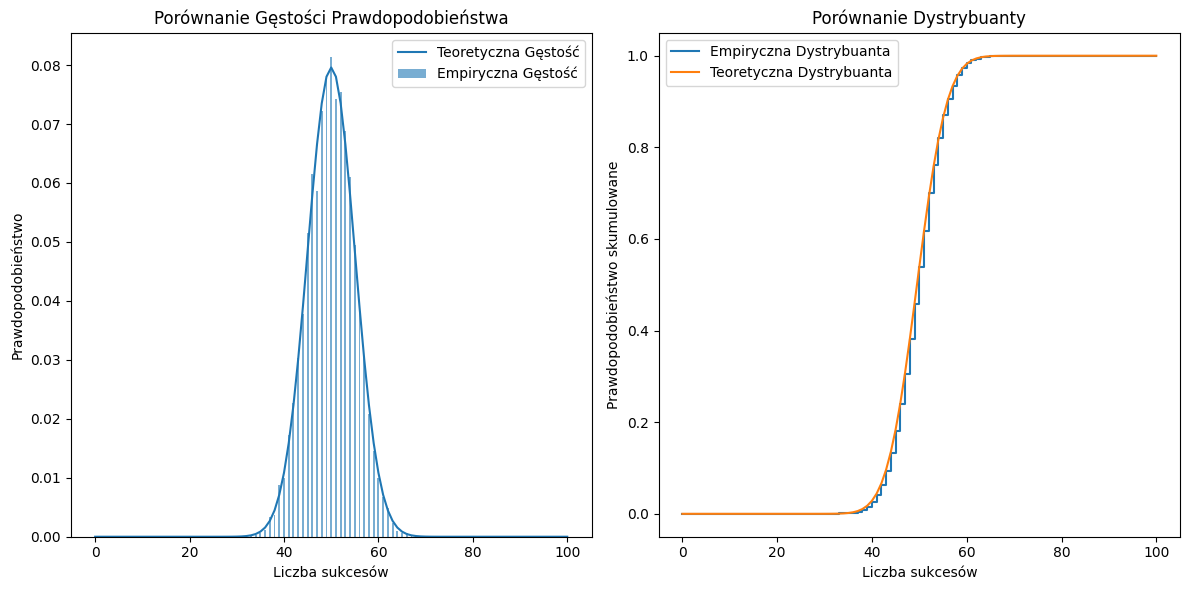

In [3]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

# Funkcja do obliczania współczynnika Newtona (n choose k)
def binomial_coeff(n, k):
    return math.comb(n, k)

# Funkcja do teoretycznej gęstości rozkładu dwumianowego
def binomial_pdf(n, p, k):
    return binomial_coeff(n, k) * (p ** k) * ((1 - p) ** (n - k))

# Funkcja do empirycznej gęstości
def empirical_pdf(n, p, M):
    successes_count = [0] * (n + 1)
    
    for _ in range(M):
        successes = binomial_trial(n, p)
        successes_count[successes] += 1
    
    return [count / M for count in successes_count]

# Funkcja do symulacji próby z rozkładu dwumianowego
def binomial_trial(n, p):
    successes = 0
    for _ in range(n):
        if random.random() < p:
            successes += 1
    return successes

# Funkcja do teoretycznej dystrybuanty
def binomial_cdf(n, p, k):
    return sum(binomial_pdf(n, p, i) for i in range(k + 1))

# Funkcja do empirycznej dystrybuanty
def empirical_cdf(n, p, M):
    successes_count = [0] * (n + 1)
    
    for _ in range(M):
        successes = binomial_trial(n, p)
        successes_count[successes] += 1
    
    cumulative_count = np.cumsum(successes_count)
    return cumulative_count / M

# Parametry
n = 100  # liczba prób
p = 0.5  # prawdopodobieństwo sukcesu
M = 10000  # liczba prób do symulacji

# Obliczanie teoretycznych wartości dla gęstości i dystrybuanty
k_values = list(range(n + 1))
theoretical_pdf = [binomial_pdf(n, p, k) for k in k_values]
theoretical_cdf = [binomial_cdf(n, p, k) for k in k_values]

# Obliczanie empirycznych wartości dla gęstości i dystrybuanty
empirical_pdf_values = empirical_pdf(n, p, M)
empirical_cdf_values = empirical_cdf(n, p, M)

# Rysowanie wykresów porównujących teoretyczne i empiryczne wartości

# Gęstość prawdopodobieństwa
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(k_values, empirical_pdf_values, width=0.4, alpha=0.6, label="Empiryczna Gęstość")
plt.plot(k_values, theoretical_pdf, label="Teoretyczna Gęstość")
plt.xlabel("Liczba sukcesów")
plt.ylabel("Prawdopodobieństwo")
plt.title("Porównanie Gęstości Prawdopodobieństwa")
plt.legend()

# Dystrybuanta
plt.subplot(1, 2, 2)
plt.step(k_values, empirical_cdf_values, where="post", label="Empiryczna Dystrybuanta")
plt.plot(k_values, theoretical_cdf, label="Teoretyczna Dystrybuanta")
plt.xlabel("Liczba sukcesów")
plt.ylabel("Prawdopodobieństwo skumulowane")
plt.title("Porównanie Dystrybuanty")
plt.legend()

plt.tight_layout()
plt.show()


### Zadanie 5.

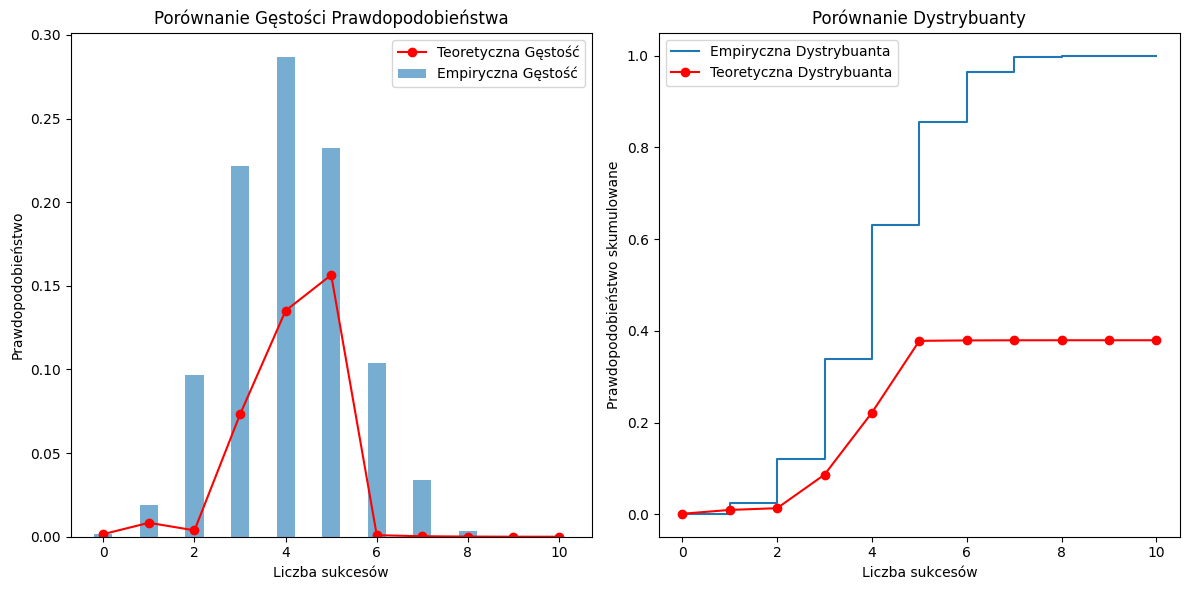

In [12]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

# Funkcja do obliczania współczynnika Newtona (n choose k)
def binomial_coeff(n, k):
    return math.comb(n, k)

# Funkcja do teoretycznej gęstości rozkładu dwumianowego
def binomial_pdf(n, p_vector, k):
    # Prawdopodobieństwo sukcesu w danej próbie
    # Obliczamy prawdopodobieństwo sukcesu dla k prób
    probability = 1
    for i in range(k):
        probability *= p_vector[i]  # Produkt prawdopodobieństw sukcesów
    for i in range(k, n):
        probability *= (1 - p_vector[i])  # Produkt prawdopodobieństw porażek
    return binomial_coeff(n, k) * probability

# Funkcja do empirycznej gęstości
def empirical_pdf(n, p_vector, M):
    successes_count = [0] * (n + 1)
    
    for _ in range(M):
        successes = sum(binomial_vector_with_p(n, p_vector))
        successes_count[successes] += 1
    
    return [count / M for count in successes_count]

# Funkcja do symulacji próby z rozkładu dwumianowego z wektorem p
def binomial_vector_with_p(n, p_vector):
    return [1 if random.random() < p_vector[i] else 0 for i in range(n)]

# Funkcja do teoretycznej dystrybuanty
def binomial_cdf(n, p_vector, k):
    return sum(binomial_pdf(n, p_vector, i) for i in range(k + 1))

# Funkcja do empirycznej dystrybuanty
def empirical_cdf(n, p_vector, M):
    successes_count = [0] * (n + 1)
    
    for _ in range(M):
        successes = sum(binomial_vector_with_p(n, p_vector))
        successes_count[successes] += 1
    
    cumulative_count = np.cumsum(successes_count)
    return cumulative_count / M

# Parametry
n = 10  # liczba prób
p_vector = np.random.rand(n)  # Wektora prawdopodobieństw sukcesu dla każdej próby (losowe wartości w przedziale [0,1])
M = 10000  # liczba prób do symulacji

# Obliczanie teoretycznych wartości dla gęstości i dystrybuanty
k_values = list(range(n + 1))
theoretical_pdf = [binomial_pdf(n, p_vector, k) for k in k_values]
theoretical_cdf = [binomial_cdf(n, p_vector, k) for k in k_values]

# Obliczanie empirycznych wartości dla gęstości i dystrybuanty
empirical_pdf_values = empirical_pdf(n, p_vector, M)
empirical_cdf_values = empirical_cdf(n, p_vector, M)

# Rysowanie wykresów porównujących teoretyczne i empiryczne wartości

# Gęstość prawdopodobieństwa
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(k_values, empirical_pdf_values, width=0.4, alpha=0.6, label="Empiryczna Gęstość")
plt.plot(k_values, theoretical_pdf, 'ro-', label="Teoretyczna Gęstość")
plt.xlabel("Liczba sukcesów")
plt.ylabel("Prawdopodobieństwo")
plt.title("Porównanie Gęstości Prawdopodobieństwa")
plt.legend()

# Dystrybuanta
plt.subplot(1, 2, 2)
plt.step(k_values, empirical_cdf_values, where="post", label="Empiryczna Dystrybuanta")
plt.plot(k_values, theoretical_cdf, 'ro-', label="Teoretyczna Dystrybuanta")
plt.xlabel("Liczba sukcesów")
plt.ylabel("Prawdopodobieństwo skumulowane")
plt.title("Porównanie Dystrybuanty")
plt.legend()

plt.tight_layout()
plt.show()


# Część V

### Zadanie 10.